In [1]:
import matplotlib.pyplot as plt  # data plotting
import numpy as np  # data processing
import pandas as pd  # data processing
from joblib import dump  # saving the model
from sklearn.datasets import load_breast_cancer  # loading the dataset
from sklearn.metrics import (accuracy_score, auc,  # accuracy metrics
                             classification_report, confusion_matrix,
                             roc_auc_score, roc_curve)
from sklearn.model_selection import train_test_split  # splitting the dataset
from sklearn.preprocessing import StandardScaler  # scaling the dataset
from sklearn.svm import SVC  # classification algorithm

In [2]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
breast_cancer = load_breast_cancer()
df_breast_cancer = sklearn_to_df(breast_cancer)
df_breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
X = df_breast_cancer.iloc[:, :-1].values
y = df_breast_cancer.iloc[:, -1].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
svc = SVC(kernel='linear', C=1, gamma=0.5, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [7]:
svc_con_matrix = confusion_matrix(y_test, y_pred)
svc_acc = accuracy_score(y_test, y_pred)
print('Confusion Matrix', '\n', svc_con_matrix, '\n')
print('Accuracy of Support Vector Classification :', svc_acc*100, '\n')
print('Classification Report', '\n', classification_report(y_test, y_pred))

Confusion Matrix 
 [[22  0]
 [ 0 35]] 

Accuracy of Support Vector Classification : 100.0 

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        35

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



In [8]:
y_score = svc.predict_proba(X_test)[:, 1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)

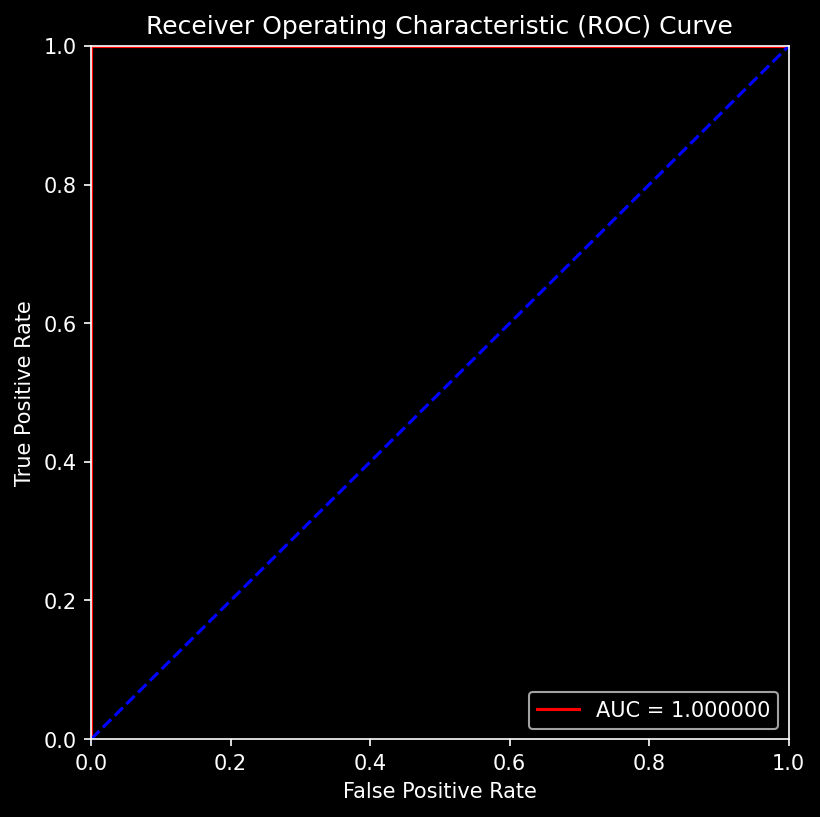

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.plot(false_positive_rate, true_positive_rate, 'r', label='AUC = %f' % roc_auc)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('Images/ROC_Curve.png', bbox_inches='tight')

In [10]:
print('Area Under the Receiver Operating Characteristic Curve :', roc_auc_score(y_test, y_score))

Area Under the Receiver Operating Characteristic Curve : 1.0


In [11]:
dump(svc, 'scaledSVC.joblib')

['scaledSVC.joblib']